In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

### Data Preprocessing

In [22]:
df=pd.read_csv('road-accidents.csv')
df.head()

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...


In [23]:
df[5:10]

,##### LICENSE #####
5,# perc_fatl_alcohol = Percentage Of Drivers In...
6,# perc_fatl_1st_time = Percentage Of Drivers I...
7,##### DATA BEGIN #####
8,state|drvr_fatl_col_bmiles|perc_fatl_speed|per...
9,Alabama|18.8|39|30|80


In [24]:
col_names=df.iloc[8,0]
col_names=col_names.split('|')
col_names

['state',
 'drvr_fatl_col_bmiles',
 'perc_fatl_speed',
 'perc_fatl_alcohol',
 'perc_fatl_1st_time']

#### drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)
#### perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)
#### perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)
#### perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)

Dropping the top 9 rows as they contain description data

In [25]:
df.drop(index=[i for i in range(0,9,1)],inplace=True)
df.head()

,##### LICENSE #####
9,Alabama|18.8|39|30|80
10,Alaska|18.1|41|25|94
11,Arizona|18.6|35|28|96
12,Arkansas|22.4|18|26|95
13,California|12|35|28|89


Now cleaning the data to generate organized dataframe.

In [26]:
state=[]
drvr_fatl_col_bmiles=[]
perc_fatl_speed=[]
perc_fatl_alcohol=[]
perc_fatl_1st_time=[]
for i in range(0,df.shape[0]):
    s=df.iloc[i,0].split('|')
    state.append(s[0])
    drvr_fatl_col_bmiles.append(s[1])
    perc_fatl_speed.append(s[2])
    perc_fatl_alcohol.append(s[3])
    perc_fatl_1st_time.append(s[4])

In [27]:
drvr_fatl_col_bmiles[0:4]

['18.8', '18.1', '18.6', '22.4']

In [28]:
d = {'state': state, 'drvr_fatl_col_bmiles': drvr_fatl_col_bmiles, 'perc_fatl_speed':perc_fatl_speed,'perc_fatl_alcohol':perc_fatl_alcohol,'perc_fatl_1st_time':perc_fatl_1st_time}
df = pd.DataFrame(data=d,dtype=float)
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39.0,30.0,80.0
1,Alaska,18.1,41.0,25.0,94.0
2,Arizona,18.6,35.0,28.0,96.0
3,Arkansas,22.4,18.0,26.0,95.0
4,California,12.0,35.0,28.0,89.0


Fetching basic statistical information for each feature

In [29]:
df.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


The values don't give much observable idea about the data. Therefor generating vizualizations using graph.

### Data Visualization

Generating bar graphs to depict the distribution of values for each feature of the dataset. 

In [30]:
#Strug's rule to determine optimum number of buckets
K = int(1 + 3.322*np.log(df.shape[0]))
K

14

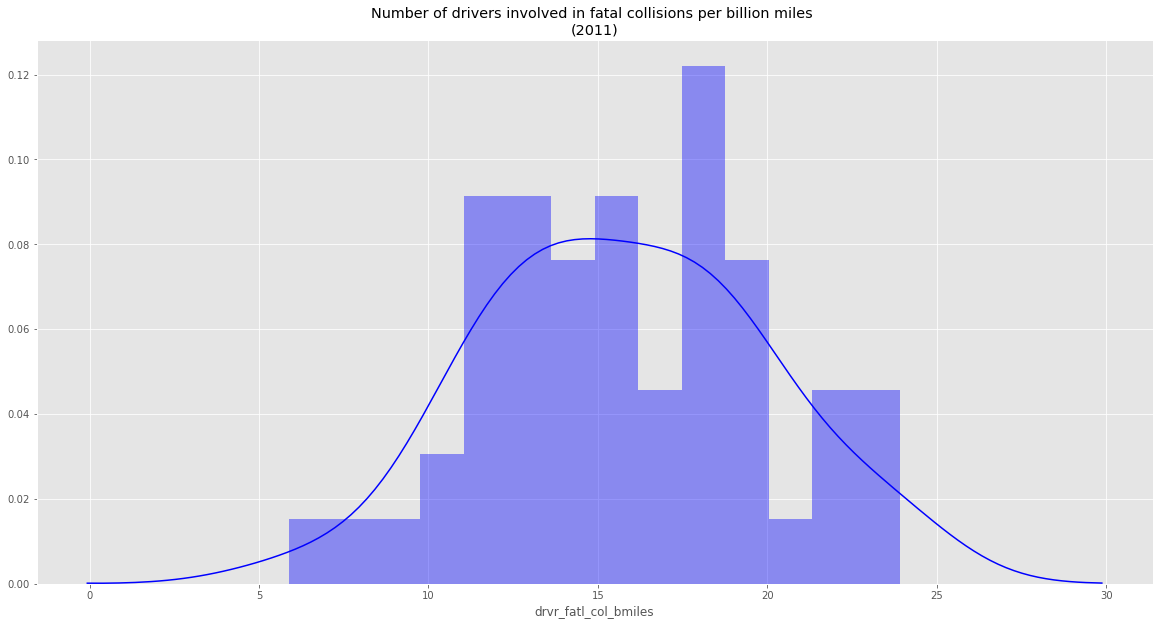

In [31]:
x=df['drvr_fatl_col_bmiles']
plt.figure(figsize=(20,10))
sns.distplot(x,color='blue',bins=K)
plt.title('Number of drivers involved in fatal collisions per billion miles \n(2011)')
plt.show()

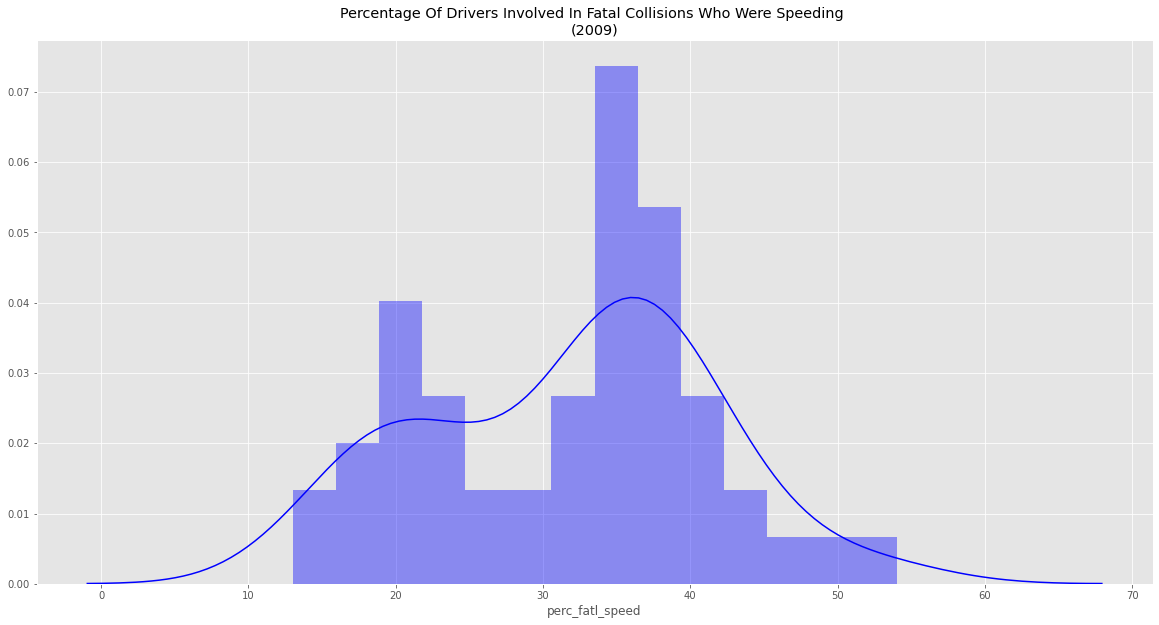

In [32]:
x=df['perc_fatl_speed']
plt.figure(figsize=(20,10))
sns.distplot(x,color='blue',bins=K)
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding \n(2009)')
plt.savefig('test.png')
plt.show()

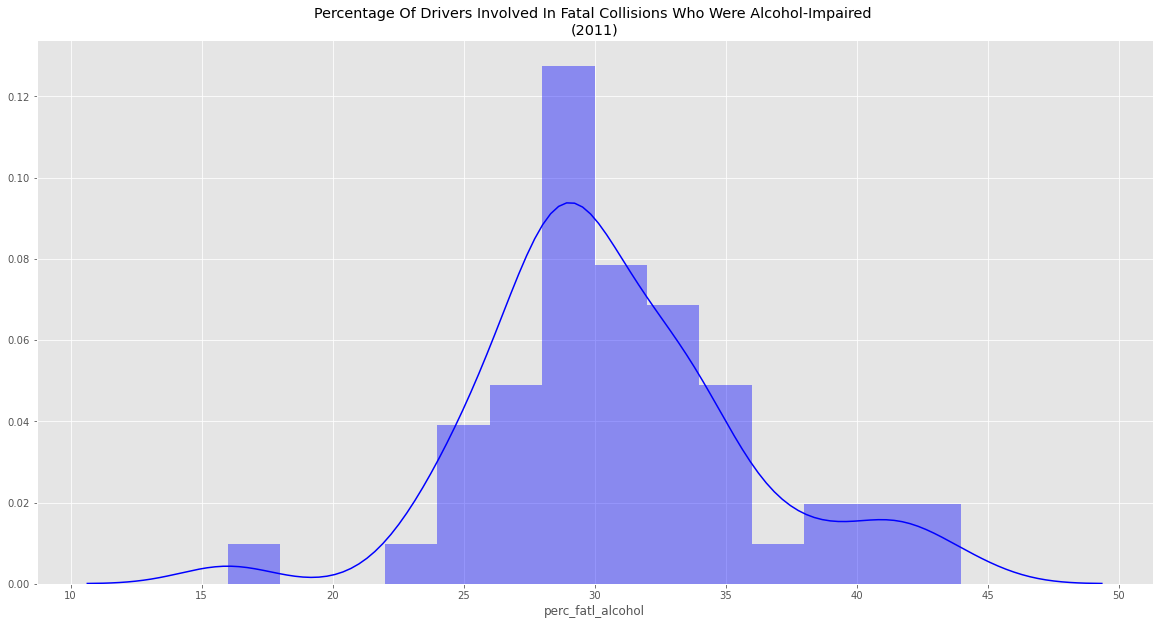

In [33]:
x=df['perc_fatl_alcohol']
plt.figure(figsize=(20,10))
sns.distplot(x,color='blue',bins=K)
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired \n(2011)')
plt.show()

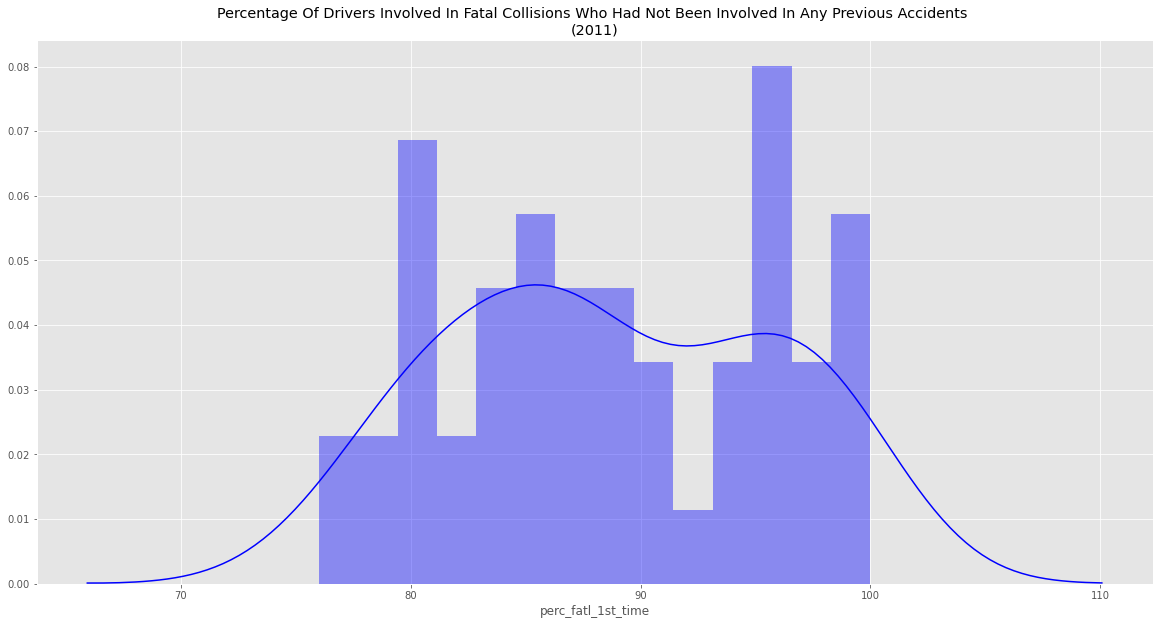

In [34]:
x=df['perc_fatl_1st_time']
plt.figure(figsize=(20,10))
sns.distplot(x,color='blue',bins=K)
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents \n(2011)')
plt.show()

#### Most of the features show close to Normal Distribution behaviour. The deviations can be handled by Scaling to normalize the values to get better results. 

Genrating Pairplots to check the correlation between the features visually.

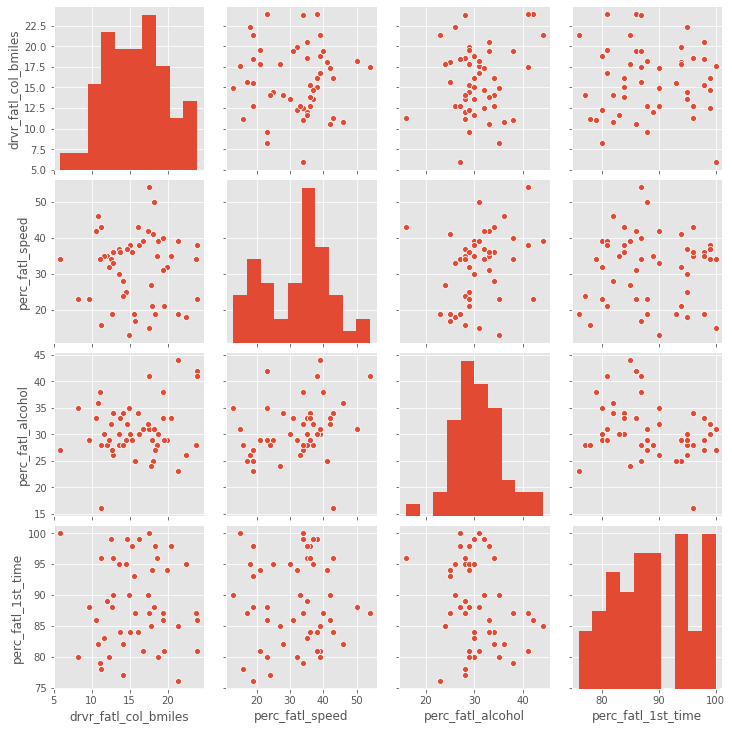

In [35]:
sns.pairplot(df)

All feature pairs show upto weak correaltion in the pairplot. Therefore calculating numerical correlation values using Pearson Correlation coefficient. 
Conevntional Thresholds for Correlation-
- 0.2 = weak 
- 0.5 = medium 
- 0.8 = strong 
- 0.9 = very strong 

In [36]:
from scipy.stats import pearsonr
for i in range(2,len(col_names)):
    coef, p = pearsonr(df[col_names[i]],df.drvr_fatl_col_bmiles)
    s='Pearson correlation coefficient between {} and {} : {}'.format(col_names[i],col_names[1],coef)
    print(s)

Pearson correlation coefficient between perc_fatl_speed and drvr_fatl_col_bmiles : -0.02908014591399068
Pearson correlation coefficient between perc_fatl_alcohol and drvr_fatl_col_bmiles : 0.19942634378011184
Pearson correlation coefficient between perc_fatl_1st_time and drvr_fatl_col_bmiles : -0.017941876874043666


In [37]:
cor_mat=df.corr()
cor_mat

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


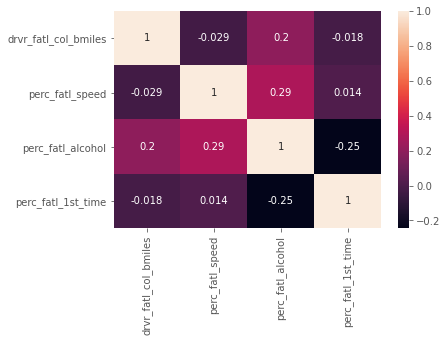

In [38]:
# plt.figure(figsize=(5,5))
sns.heatmap(cor_mat,annot=True)
plt.show()

Most feature pairs show very weak correaltion. But the following show weak correlation-
1. Fatality due to alcohol and Target
2. Fatality due to alcohol and fatility due to speeding
3. Fatality due to alcohol and fatility who were not innvolved in any accident before

### Analysis and Pattern Recognition using Unsupervised Machine Learning

Setting Fatalities per billion miles as target variable and using the rest features as independent features.

In [39]:
df.loc[:,['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']].head()

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,39.0,30.0,80.0
1,41.0,25.0,94.0
2,35.0,28.0,96.0
3,18.0,26.0,95.0
4,35.0,28.0,89.0


In [40]:
from sklearn.model_selection import train_test_split

Training a Linear Regression Model to get regression coefficients.

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(df.loc[:,['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']],df.loc[:,['drvr_fatl_col_bmiles']])
regressor

LinearRegression()

In [42]:
reg=regressor.coef_[0]
reg

array([-0.04180041,  0.19086404,  0.02473301])

In [43]:
cor=cor_mat.iloc[0,1:4]
cor=cor.to_numpy()
cor

array([-0.02908015,  0.19942634, -0.01794188])

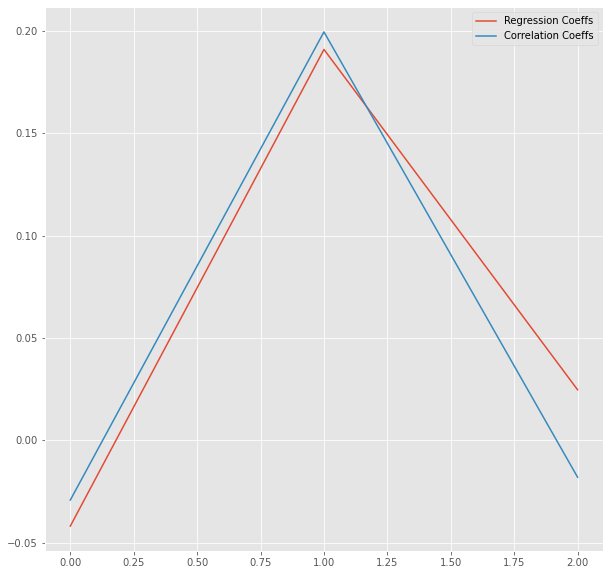

In [44]:
plt.figure(figsize=(10,10))
plt.plot(reg)
plt.plot(cor)
plt.legend(['Regression Coeffs','Correlation Coeffs'])
plt.show()

The Correalation and Regression coefficients show more or less similar behaviour in this dataset.

Scaling the features using Standard Scaler

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=True, with_std=True)
df_sc=sc.fit_transform(df.loc[:,['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']])
df_sc[0:5]

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289]])

Visualizing the 3 features in a graph.

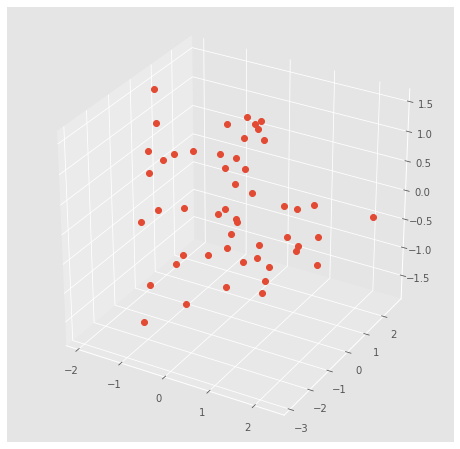

In [46]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D,proj3d
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(df_sc[:,0],df_sc[:,1],df_sc[:,2],'o')
plt.show()

Selecting 2 components out of 3 using Principal component analysis and visualizing on 2 dimensional.

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
trans_data=pca.fit_transform(df_sc)
trans_data[0:2]

array([[ 0.88463912,  0.46421102],
       [-0.62529903, -1.22024698]])

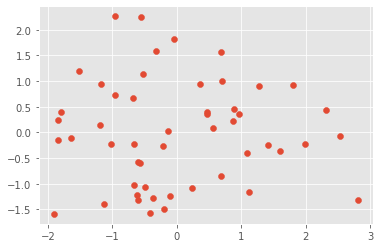

In [48]:
plt.scatter(trans_data[:,0],trans_data[:,1])
plt.show()

Unsupervised Machine Learning. KMeans Clustering

Testing KMeans algo.

In [49]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0)
ymeans=kmeans.fit_predict(trans_data)
ymeans[0]

0

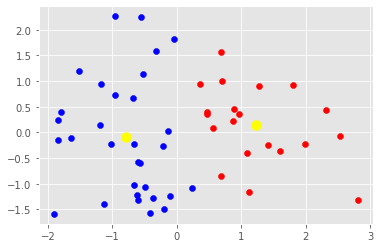

In [50]:
plt.scatter(trans_data[ymeans==0, 0], trans_data[ymeans==0, 1],c='red', label ='Cluster 1')
plt.scatter(trans_data[ymeans==1, 0], trans_data[ymeans==1, 1],c='blue', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.show()

On transformed data-
Finding optimal number of clusters using the Elbow Method. Detemining optimal K visually by plotting the curve.

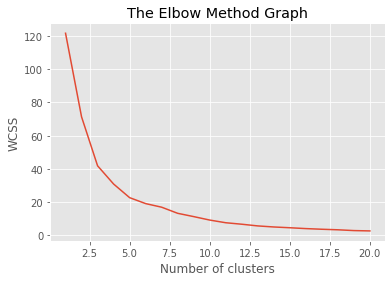

In [51]:
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(trans_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()  

Optimal Number of clusters or K=3. Plotting the clusters with respective centroids of each cluster.

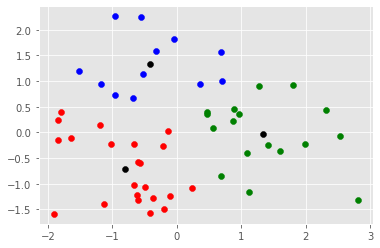

In [52]:
k=3
kmeans=KMeans(n_clusters=k,random_state=0)
ymeans=kmeans.fit_predict(trans_data)
colors=['red','blue','green']
for i in range(k):
    plt.scatter(trans_data[ymeans==i, 0], trans_data[ymeans==i, 1],c=colors[i], label ='Cluster {}'.format(i))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='black', label = 'Centroids')
plt.show()

### Visualizing the clustering results on original data

Considering centroids of each cluster as representation of the cluster data, comparing the 3 features by cluster centroids.

In [53]:
centroids=kmeans.cluster_centers_[:]
centroids

array([[-0.80898887, -0.71006388],
       [-0.41645986,  1.34033062],
       [ 1.34089844, -0.02720954]])

In [54]:
centroids=pca.inverse_transform(centroids)
centroids

array([[ 0.02964389, -0.58133016,  0.90544474],
       [-1.09487961, -0.28953064, -0.82905707],
       [ 0.73449352,  0.95668419, -0.58653526]])

In [55]:
centroids=sc.inverse_transform(centroids)
centroids

array([[32.00824918, 27.73215934, 94.96539543],
       [21.28195318, 29.21498175, 83.01201333],
       [38.73147529, 35.54780667, 84.68336121]])

'perc_fatl_speed',
 'perc_fatl_alcohol',
 'perc_fatl_1st_time'

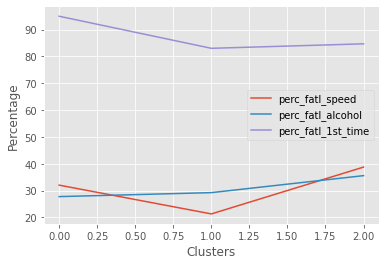

In [56]:
plt.plot(centroids[:,0],label='perc_fatl_speed')
plt.plot(centroids[:,1],label='perc_fatl_alcohol')
plt.plot(centroids[:,2],label='perc_fatl_1st_time')
plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.legend()
plt.show()

Results are not very reflective of the variation of features by clusters. Therefore using another approach.

Mapping the datapoints (States) to the cluster they belong to and updating the dataframe by addition of another column.

In [57]:
clusters=kmeans.labels_
clusters,len(clusters)

(array([2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1,
        1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2,
        0, 0, 1, 2, 0, 2, 2]),
 51)

In [58]:
data=pca.inverse_transform(trans_data)
data[:5]

array([[ 0.17079119,  0.63391004, -0.75303829],
       [ 0.45985266, -0.45316342,  1.20961979],
       [ 0.30985122, -0.48517375,  1.08456235],
       [-1.13946985, -1.31129605,  0.65084388],
       [ 0.05384462, -0.15256002,  0.29075595]])

In [59]:
data=sc.inverse_transform(data)
data[:5]

array([[33.35458632, 33.90758212, 83.53589951],
       [36.11180646, 28.38345757, 97.0616288 ],
       [34.68101394, 28.22079236, 96.19979096],
       [20.85662799, 24.02272976, 93.21080437],
       [32.2390885 , 29.91101822, 90.7292454 ]])

In [60]:
df[:5]

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39.0,30.0,80.0
1,Alaska,18.1,41.0,25.0,94.0
2,Arizona,18.6,35.0,28.0,96.0
3,Arkansas,22.4,18.0,26.0,95.0
4,California,12.0,35.0,28.0,89.0


In [61]:
df['cluster']=clusters
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
0,Alabama,18.8,39.0,30.0,80.0,2
1,Alaska,18.1,41.0,25.0,94.0,0
2,Arizona,18.6,35.0,28.0,96.0,0
3,Arkansas,22.4,18.0,26.0,95.0,0
4,California,12.0,35.0,28.0,89.0,0


In [62]:
df[40:51]

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
40,South Carolina,23.9,38.0,41.0,81.0,2
41,South Dakota,19.4,31.0,33.0,86.0,2
42,Tennessee,19.5,21.0,29.0,81.0,1
43,Texas,19.4,40.0,38.0,87.0,2
44,Utah,11.3,43.0,16.0,96.0,0
45,Vermont,13.6,30.0,30.0,95.0,0
46,Virginia,12.7,19.0,27.0,88.0,1
47,Washington,10.6,42.0,33.0,86.0,2
48,West Virginia,23.8,34.0,28.0,87.0,0
49,Wisconsin,13.8,36.0,33.0,84.0,2


Visualizing fatality per billion miles in each cluster.

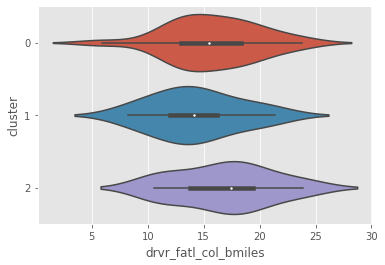

In [63]:
sns.violinplot(y=df.cluster,x=df.drvr_fatl_col_bmiles,orient='h')

Fatalities per billion miles don't show much variation in the probability distribution as depicted by the violin plot above. Therefore visualizing the 3 independent features grouped by clusters.

Using boxplots of 3 features seperately by clusters

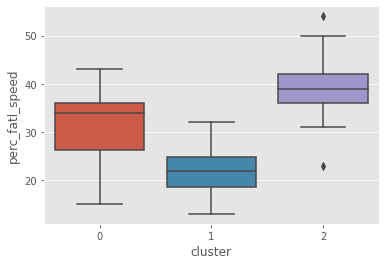

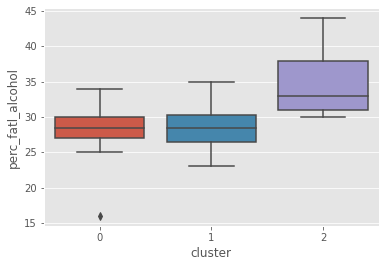

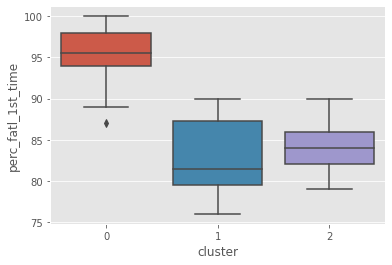

In [64]:
sns.boxplot(x=df.cluster,y=df.perc_fatl_speed)
plt.show()
sns.boxplot(x=df.cluster,y=df.perc_fatl_alcohol)
plt.show()
sns.boxplot(x=df.cluster,y=df.perc_fatl_1st_time)
plt.show()

All 3 features show variation in percentage frequency distribution when grouped by clusters seperately.

Results-
- Cluster 2 requires less attention to speeding policies as compared to others clusters 
- All the clusters require nearly equal attention to policies regarding the alcohol consumption while driving
- Cluster 0 shows much more fatality for first time drivers indicating to the need to eastablish policies to monitor first timers on road

### Decisions based on total number of fatalities imported from miles.csv

In [65]:
miles=pd.read_csv('miles-driven.csv')
miles.head()

,state|million_miles_annually
0,Alabama|64914
1,Alaska|4593
2,Arizona|59575
3,Arkansas|32953
4,California|320784


In [66]:
state=[]
million_miles_annually=[]
for i in range(0,miles.shape[0]):
    s=miles.iloc[i,0].split('|')
    state.append(s[0])
    million_miles_annually.append(float(s[1]))
state[5:10],million_miles_annually[5:10]

(['Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida'],
 [46606.0, 31197.0, 9028.0, 3568.0, 191855.0])

In [67]:
df['million_miles_annually']=million_miles_annually
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually
0,Alabama,18.8,39.0,30.0,80.0,2,64914.0
1,Alaska,18.1,41.0,25.0,94.0,0,4593.0
2,Arizona,18.6,35.0,28.0,96.0,0,59575.0
3,Arkansas,22.4,18.0,26.0,95.0,0,32953.0
4,California,12.0,35.0,28.0,89.0,0,320784.0


In [68]:
type(df['million_miles_annually'][0])

numpy.float64

Calculating total number of fatalities

In [69]:
df['number_fatl']=(df['drvr_fatl_col_bmiles']*df['million_miles_annually'])/1000
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,number_fatl
0,Alabama,18.8,39.0,30.0,80.0,2,64914.0,1220.3832
1,Alaska,18.1,41.0,25.0,94.0,0,4593.0,83.1333
2,Arizona,18.6,35.0,28.0,96.0,0,59575.0,1108.0950
3,Arkansas,22.4,18.0,26.0,95.0,0,32953.0,738.1472
4,California,12.0,35.0,28.0,89.0,0,320784.0,3849.4080


The number of fatalities in each cluster is depicted below.

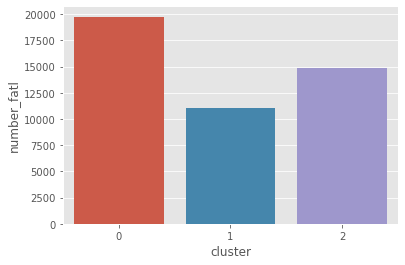

In [70]:
sns.barplot(x=df['cluster'],y=df['number_fatl'],estimator=sum, ci=None)

Cluster 0 shows highest number of fatalities but cluster size should be considered too for proper depiction of results. Therefor calculating mean number of fatalities in each cluster.

In [71]:
df.groupby(by='cluster')['number_fatl'].agg(['count','sum','mean']).sort_values(by=['mean'],ascending=False)

,count,sum,mean
cluster,,,
1,12,11044.6244,920.385367
0,22,19764.3291,898.378595
2,17,14826.2569,872.132759


#### Therefore it can be implied from the above analysis that Cluster 1 needs highest attention in terms policies to tackle traffic mortality.

In [77]:
df[df['cluster']==1].state

15             Iowa
16           Kansas
17         Kentucky
21    Massachusetts
22         Michigan
23        Minnesota
27         Nebraska
30       New Jersey
32         New York
35             Ohio
42        Tennessee
46         Virginia
Name: state, dtype: object